НИР ТМО Гордеев Никита ИУ5-64Б 

# Описание набора данных

В качестве набора данных используется датасет [Bank Customer Churn Prediction](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction)
Для решения задачи классификации был выбран набор данных содержащий информацию о клиентах, которые покинут этот банк. 

Датасет состоит из одного файла Churn_Modelling.csv

В наборе данных присутствуют следующие столбцы:
1. RowNumber - Номер строки набора данных
2. CustomerId - Указан идентификатор клиента
3. Surname - Фамилия заказчика
4. CreditScore - Кредитный рейтинг клиента
5. Geography - Место нахождения заказчика
6. Gender - Пол: мужской или женский
7. Age - Возраст заказчика
8. Tenure - С какого года клиент находится в банке
9. Balance - Средний остаток клиента
10. NumOfProducts - Количество банковских продуктов, которыми пользуется клиент
11. HasCrCard - Имеет ли клиент кредитную карту
12. IsActiveMember - Является ли клиент активным клиентом
13. EstimatedSalary - Предположительный заработок клиента
14. Exited - Покинет ли этот клиент банк или нет


Данный датасет использован для решения задачи классификации - предсказания покинет ли этот клиент банк или нет

# Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc


In [2]:
dataset = pd.read_csv('./Churn_Modelling.csv')

# Разведочный анализ данных, визуализация и предобработка данных

## Общая информация о датасете

In [3]:
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
dataset.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [5]:
dataset.shape

(10000, 11)

In [6]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Проверка на наличие пропусков

In [8]:
(dataset.isna().sum() / len(dataset)).round(4) * 100

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

## Проверка на дубликаты

In [9]:
dataset.duplicated().sum()

0

Дубликатов нет

# Меняем типы на категориальные

Geography и Gender очевидно содержит категориальные значения, поэтому переведем ее в тип category

In [10]:
dataset['Geography'] = dataset['Geography'].astype('category')
dataset['Gender'] = dataset['Gender'].astype('category')


## Визуализация

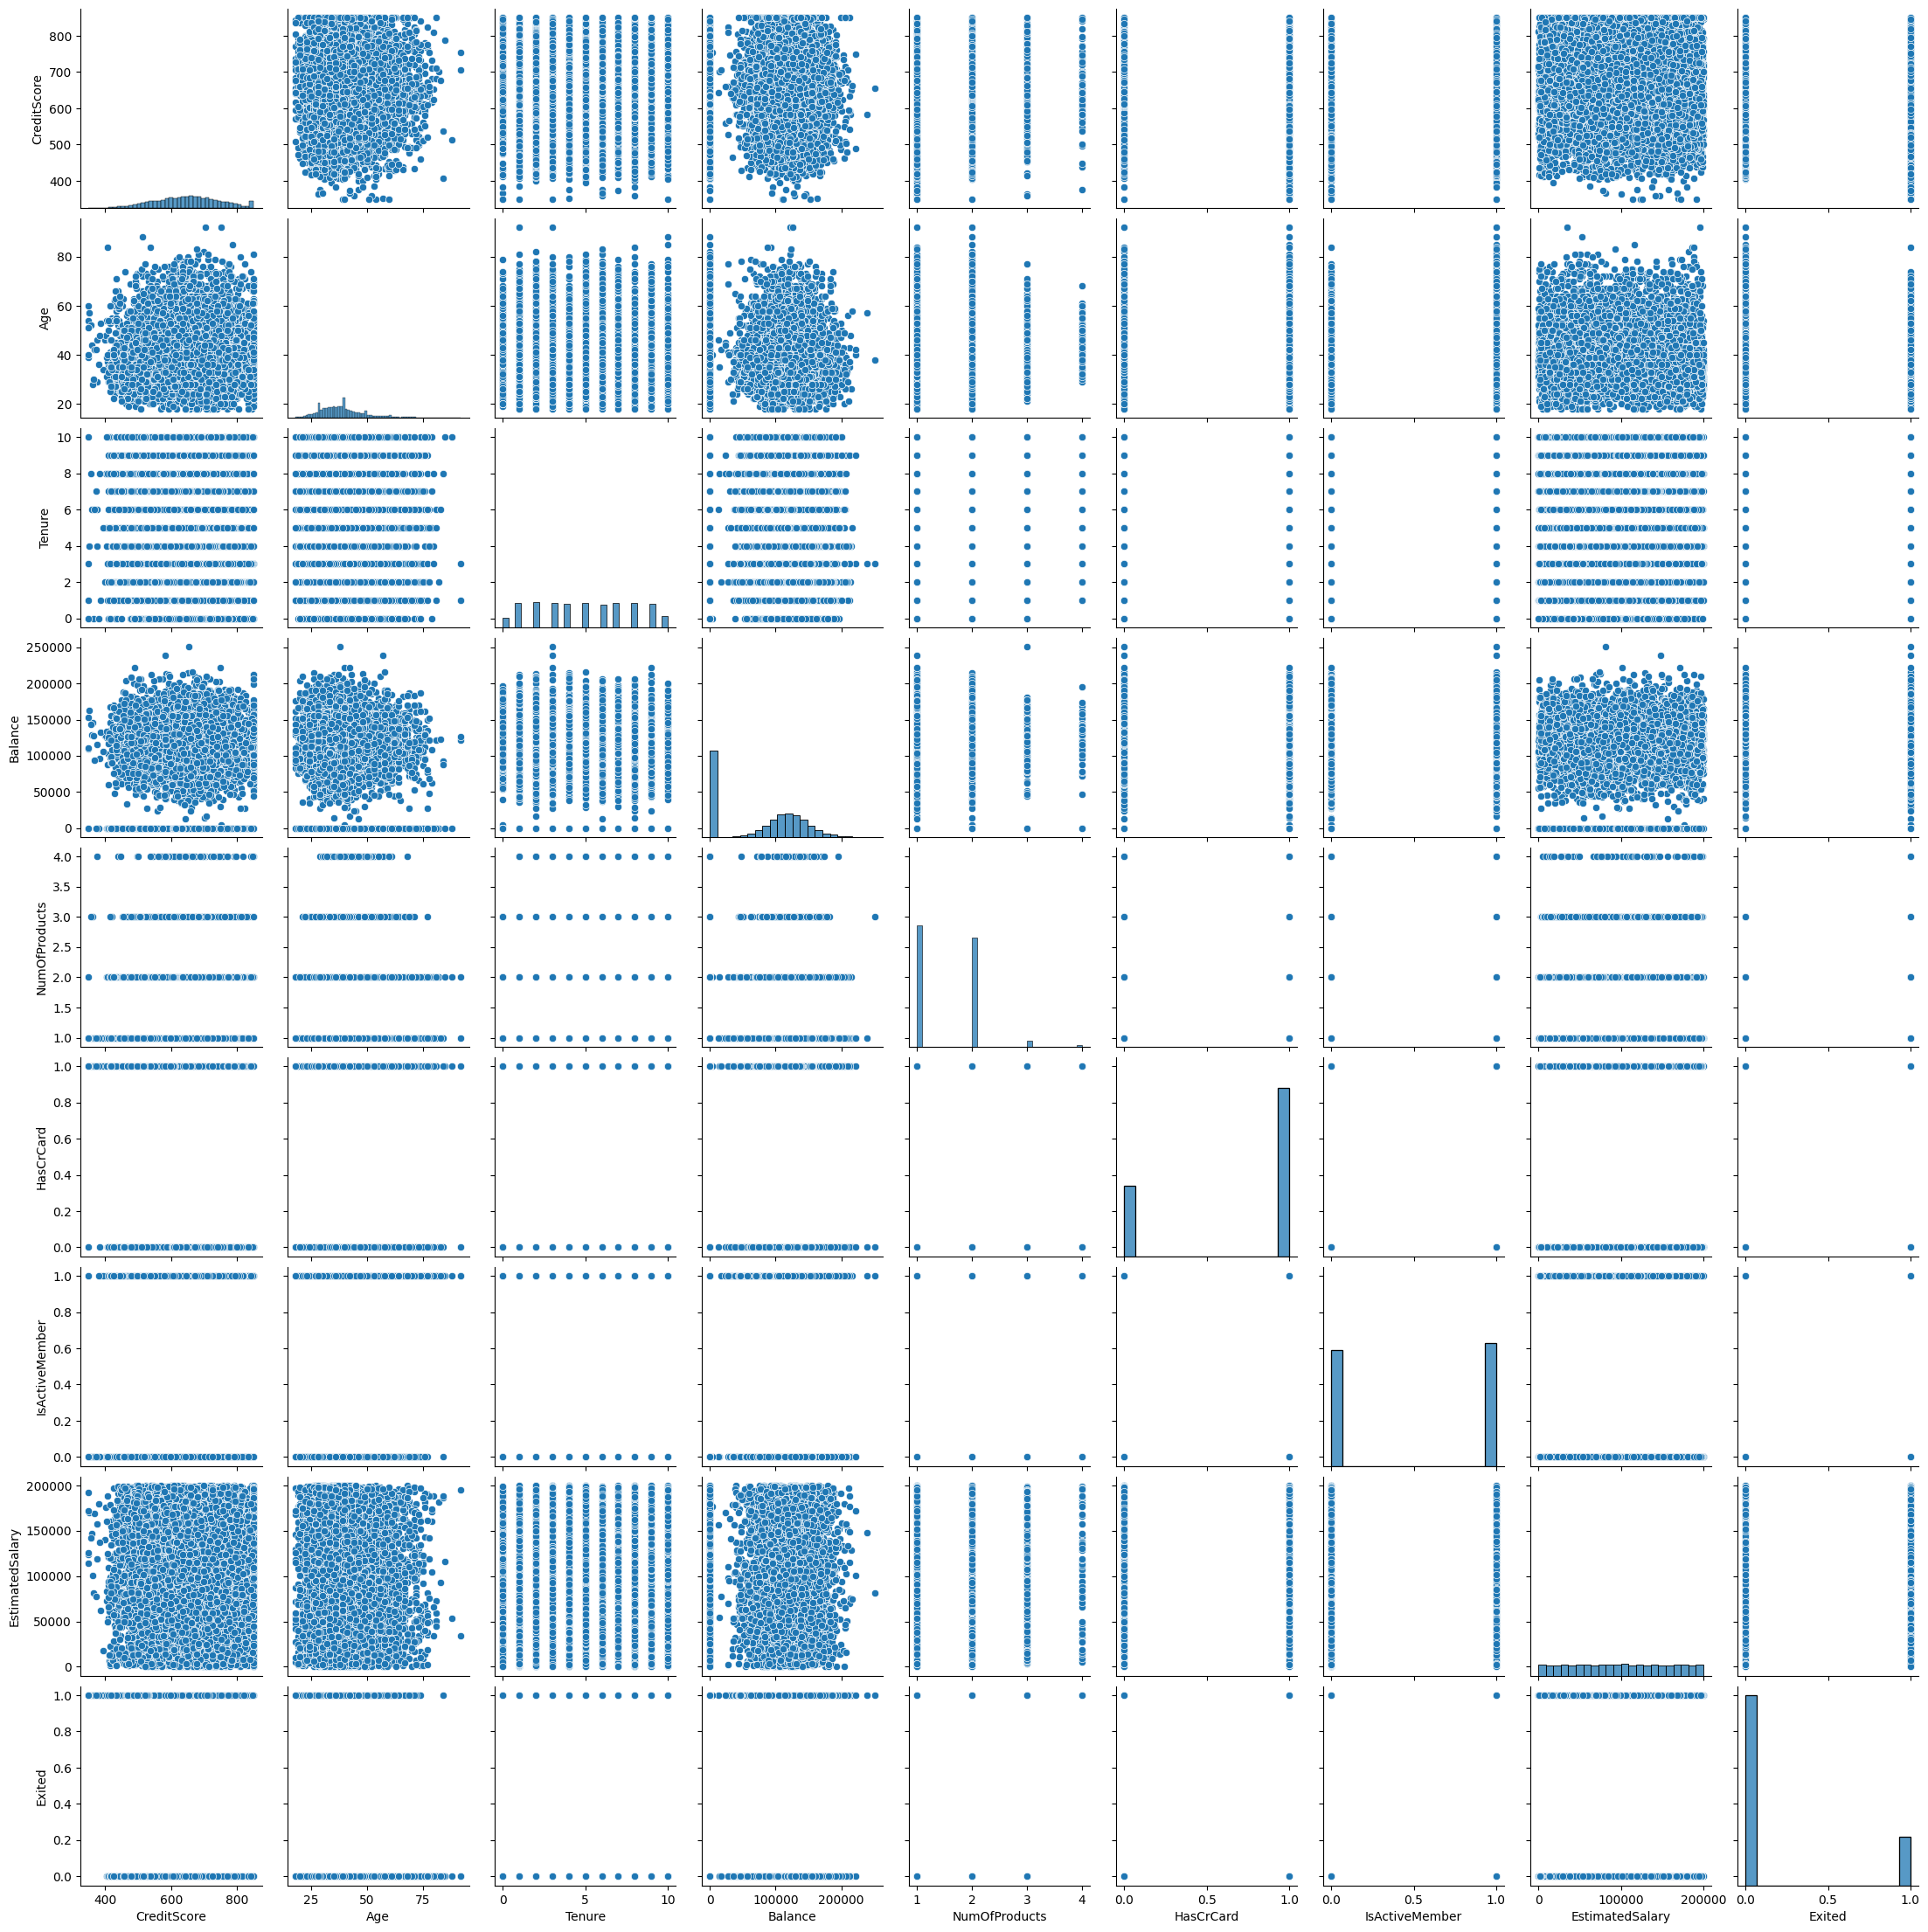

In [11]:
sns.pairplot(dataset)

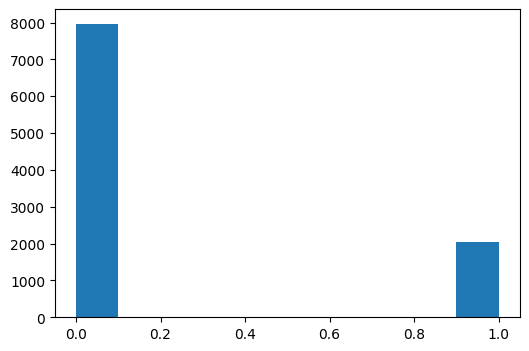

In [12]:
fig, ax = plt.subplots(figsize=(6,4)) 
plt.hist(dataset['Exited'])
plt.show()

Классы в датасете не сбалансированы

In [13]:
datasetGroupByDefault = dataset.groupby(dataset.Exited).mean()
datasetGroupByDefault

C:\Users\nagor\AppData\Local\Temp\ipykernel_8096\352866544.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datasetGroupByDefault = dataset.groupby(dataset.Exited).mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


Предположения на основании поиска среденего значения с группировкой по целевому признаку:
* у тех, кто покинет банк возраст выше
* у тех, кто покинет банк баланс на счете больше
* у тех, кто покинет банк активность ниже

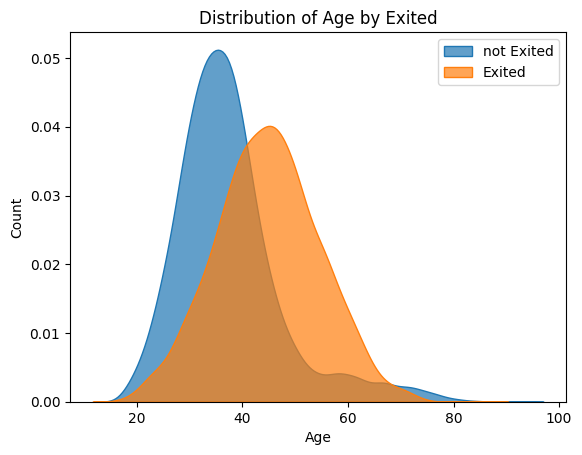

In [14]:
Exited = dataset[dataset['Exited'] == 1]['Age']
not_Exited = dataset[dataset['Exited'] == 0]['Age']

sns.kdeplot(not_Exited, fill=True, alpha=.7, label='not Exited')
sns.kdeplot(Exited, fill=True, alpha=.7, label='Exited')


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Exited')

plt.legend()

plt.show()

Можно заметить, что те, кто покинут банк - старше, чем те, кто останется

In [15]:
from scipy.stats import ttest_ind

no_Exited = dataset[dataset['Exited'] == 0]['Age']
Exited  = dataset[dataset['Exited'] == 1]['Age']


t_statistic, p_value = ttest_ind(no_Exited, Exited)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -29.76681499437077
p-value: 1.2399313093427738e-186


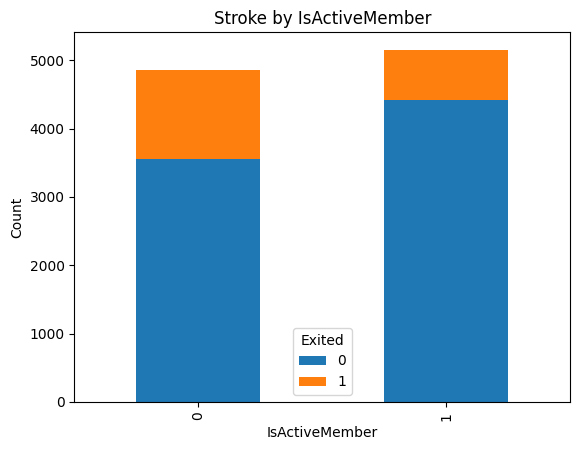

In [16]:
counts = dataset.groupby(['IsActiveMember', 'Exited'])['Exited'].count().unstack()

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

ax = counts.plot(kind='bar', stacked=True)

plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.title('Stroke by IsActiveMember')

plt.show()

Можно заметить, что те, кто покинут банк чаще являются неактивными пользователям

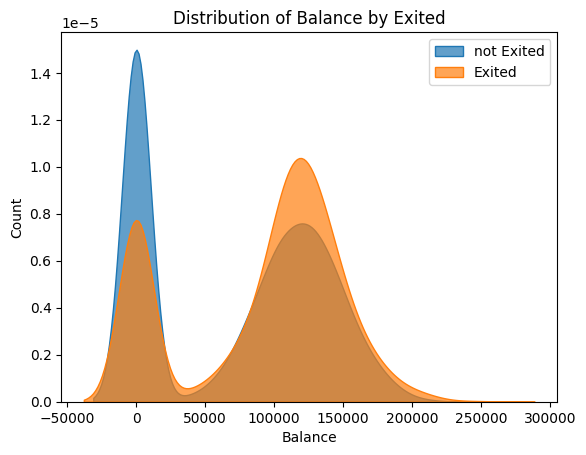

In [17]:
Exited = dataset[dataset['Exited'] == 1]['Balance']
not_Exited = dataset[dataset['Exited'] == 0]['Balance']

sns.kdeplot(not_Exited, fill=True, alpha=.7, label='not Exited')
sns.kdeplot(Exited, fill=True, alpha=.7, label='Exited')


plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Distribution of Balance by Exited')

plt.legend()

plt.show()

Можно заметить, что у тех, кто покинет банк средний баланс выше

In [18]:
from scipy.stats import ttest_ind

no_Exited = dataset[dataset['Exited'] == 0]['Balance']
Exited  = dataset[dataset['Exited'] == 1]['Balance']


t_statistic, p_value = ttest_ind(no_Exited, Exited)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -11.936240300013841
p-value: 1.2755633191525477e-32


Построим violin plot для каждого численного признака

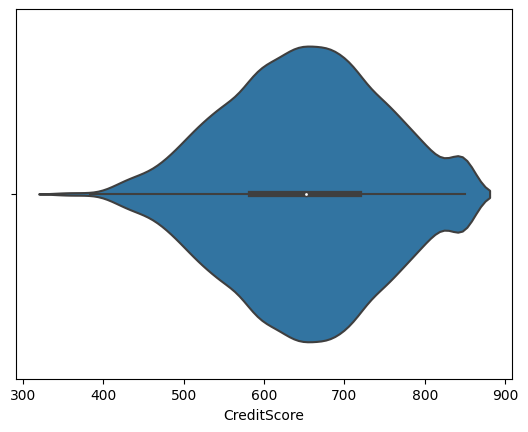

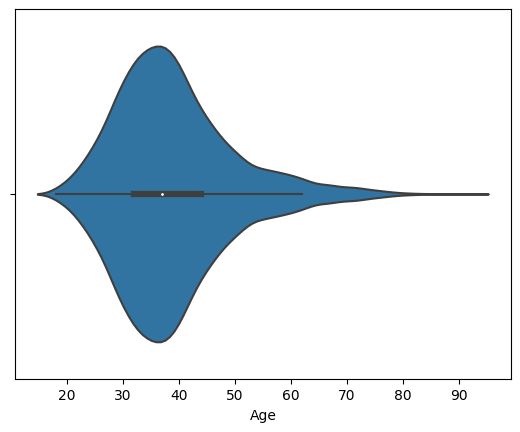

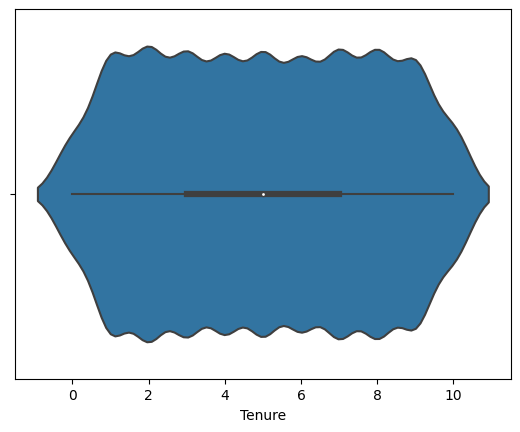

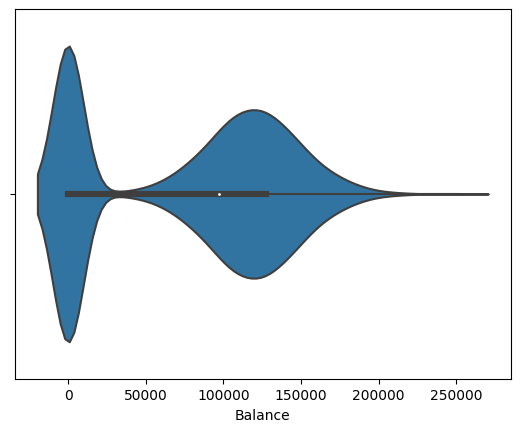

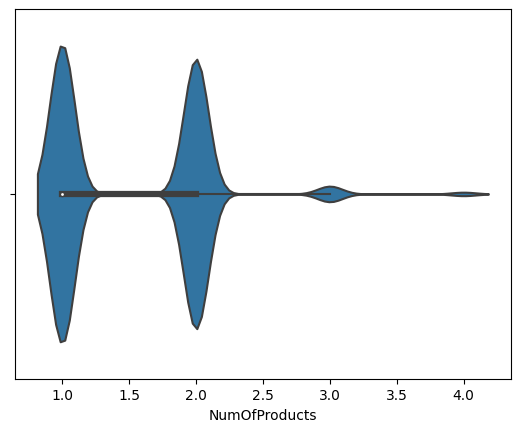

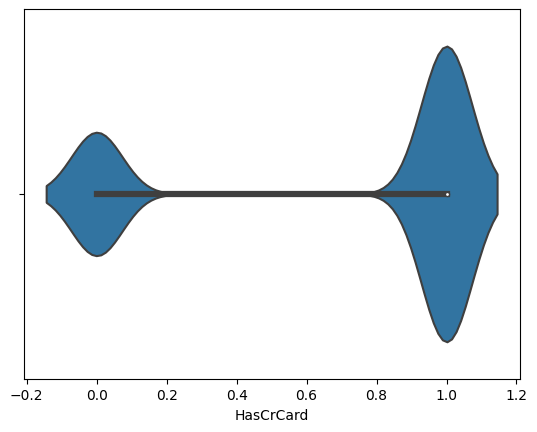

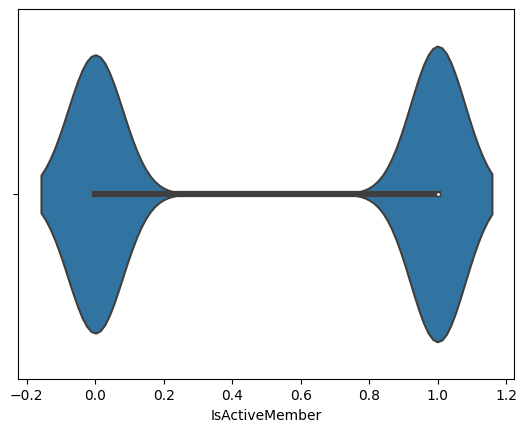

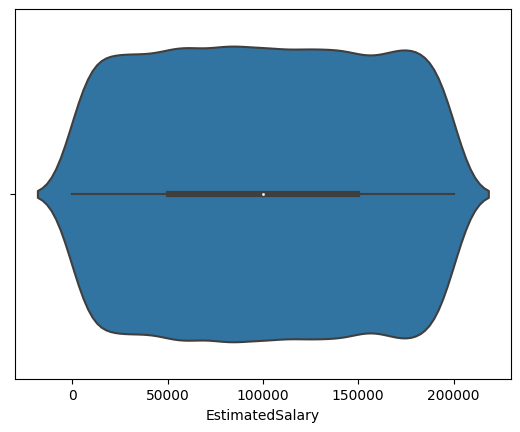

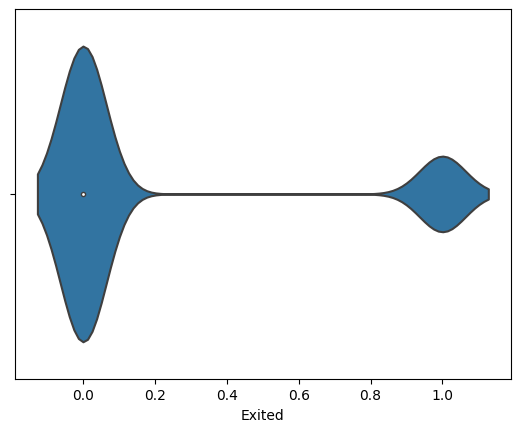

In [19]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    sns.violinplot(x=dataset[col])
    plt.show()

# Кодирование категориальных признаков, масштабирование данных.

## Масштабирование

Посмотрим на распредление колонок, которые будем масштабировать

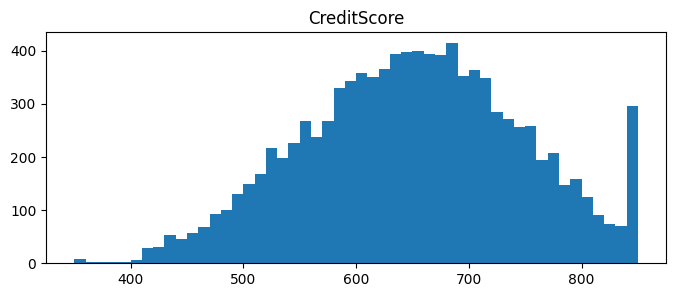

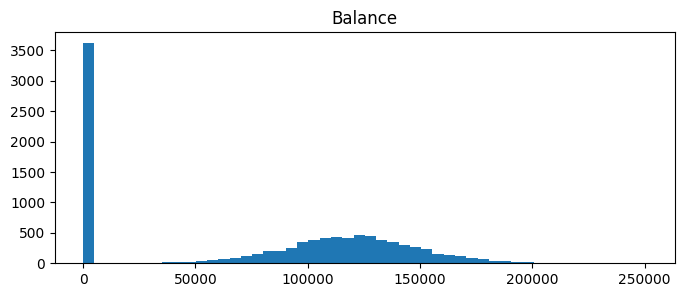

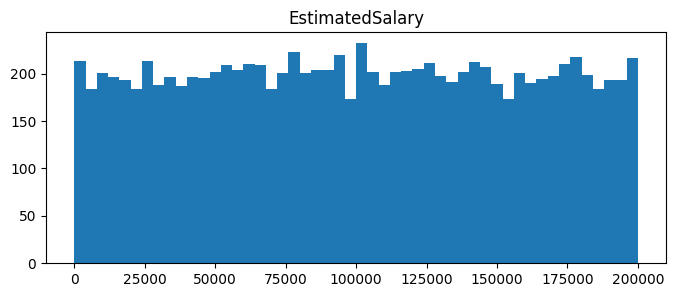

In [20]:
for col in ['CreditScore', 'Balance','EstimatedSalary']:
    fig, ax = plt.subplots(figsize=(8,3))
    ax.hist(dataset[col], 50)
    ax.title.set_text(col)
    plt.show()

Масштабируем с помощью StandardScaler, который преобразует каждый признак таким образом, чтобы он имел среднее значение равное 0 и стандартное отклонение равное 1.

In [21]:
scaler = StandardScaler()

dataset[['CreditScore', 'Balance','EstimatedSalary']] = scaler.fit_transform(dataset[['CreditScore', 'Balance','EstimatedSalary']])


In [22]:
dataset[['CreditScore', 'Balance','EstimatedSalary']].describe()

,CreditScore,Balance,EstimatedSalary
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.824585e-16,-6.252776e-17,-2.877698e-17
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-1.225848e+00,-1.740268e+00
25%,-6.883586e-01,-1.225848e+00,-8.535935e-01
50%,1.522218e-02,3.319639e-01,1.802807e-03
75%,6.981094e-01,8.199205e-01,8.572431e-01
max,2.063884e+00,2.795323e+00,1.737200e+00


Убедимся что распределение не изменилось

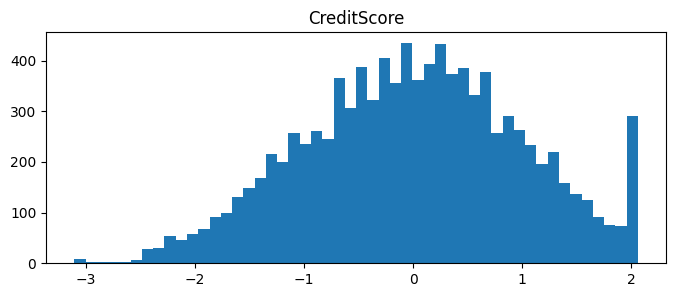

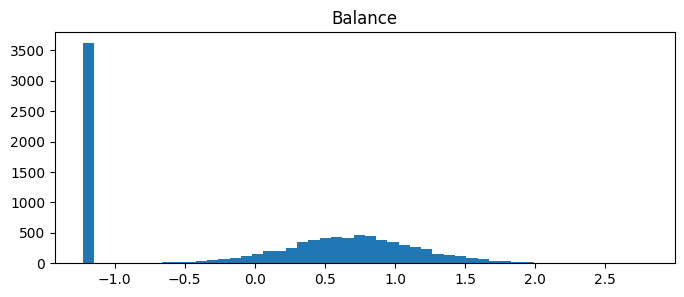

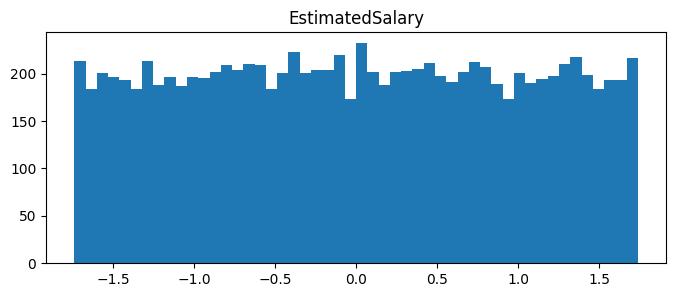

In [23]:
for col in ['CreditScore', 'Balance','EstimatedSalary']:
    fig, ax = plt.subplots(figsize=(8,3))
    ax.hist(dataset[col], 50)
    ax.title.set_text(col)
    plt.show()

## Кодирование категориальных признаков

In [24]:
category_columns = dataset.select_dtypes(include=['category']).columns
category_columns

Index(['Geography', 'Gender'], dtype='object')

Будем использовать метод OneHotEncoding, чтобы не создавать несуществующие зависимости

In [25]:
ohe = OneHotEncoder()
encoded_columns = ohe.fit_transform(dataset[category_columns])

In [26]:
dataset[np.concatenate(ohe.categories_)] = encoded_columns.toarray()
dataset.drop(category_columns, axis=1, inplace=True)
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,-0.326221,42,2,-1.225848,1,1,1,0.021886,1,1.0,0.0,0.0,1.0,0.0
1,-0.440036,41,1,0.117350,1,0,1,0.216534,0,0.0,0.0,1.0,1.0,0.0
2,-1.536794,42,8,1.333053,3,1,0,0.240687,1,1.0,0.0,0.0,1.0,0.0
3,0.501521,39,1,-1.225848,2,0,0,-0.108918,0,1.0,0.0,0.0,1.0,0.0
4,2.063884,43,2,0.785728,1,1,1,-0.365276,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,39,5,-1.225848,2,1,0,-0.066419,0,1.0,0.0,0.0,0.0,1.0
9996,-1.391939,35,10,-0.306379,1,1,1,0.027988,0,1.0,0.0,0.0,0.0,1.0
9997,0.604988,36,7,-1.225848,1,0,1,-1.008643,1,1.0,0.0,0.0,1.0,0.0
9998,1.256835,42,3,-0.022608,2,1,0,-0.125231,1,0.0,1.0,0.0,0.0,1.0


In [27]:
dataset = dataset[[x for x in dataset.columns if x != 'Exited']+['Exited']]

In [28]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,Exited
0,-0.326221,42,2,-1.225848,1,1,1,0.021886,1.0,0.0,0.0,1.0,0.0,1
1,-0.440036,41,1,0.117350,1,0,1,0.216534,0.0,0.0,1.0,1.0,0.0,0
2,-1.536794,42,8,1.333053,3,1,0,0.240687,1.0,0.0,0.0,1.0,0.0,1
3,0.501521,39,1,-1.225848,2,0,0,-0.108918,1.0,0.0,0.0,1.0,0.0,0
4,2.063884,43,2,0.785728,1,1,1,-0.365276,0.0,0.0,1.0,1.0,0.0,0


# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

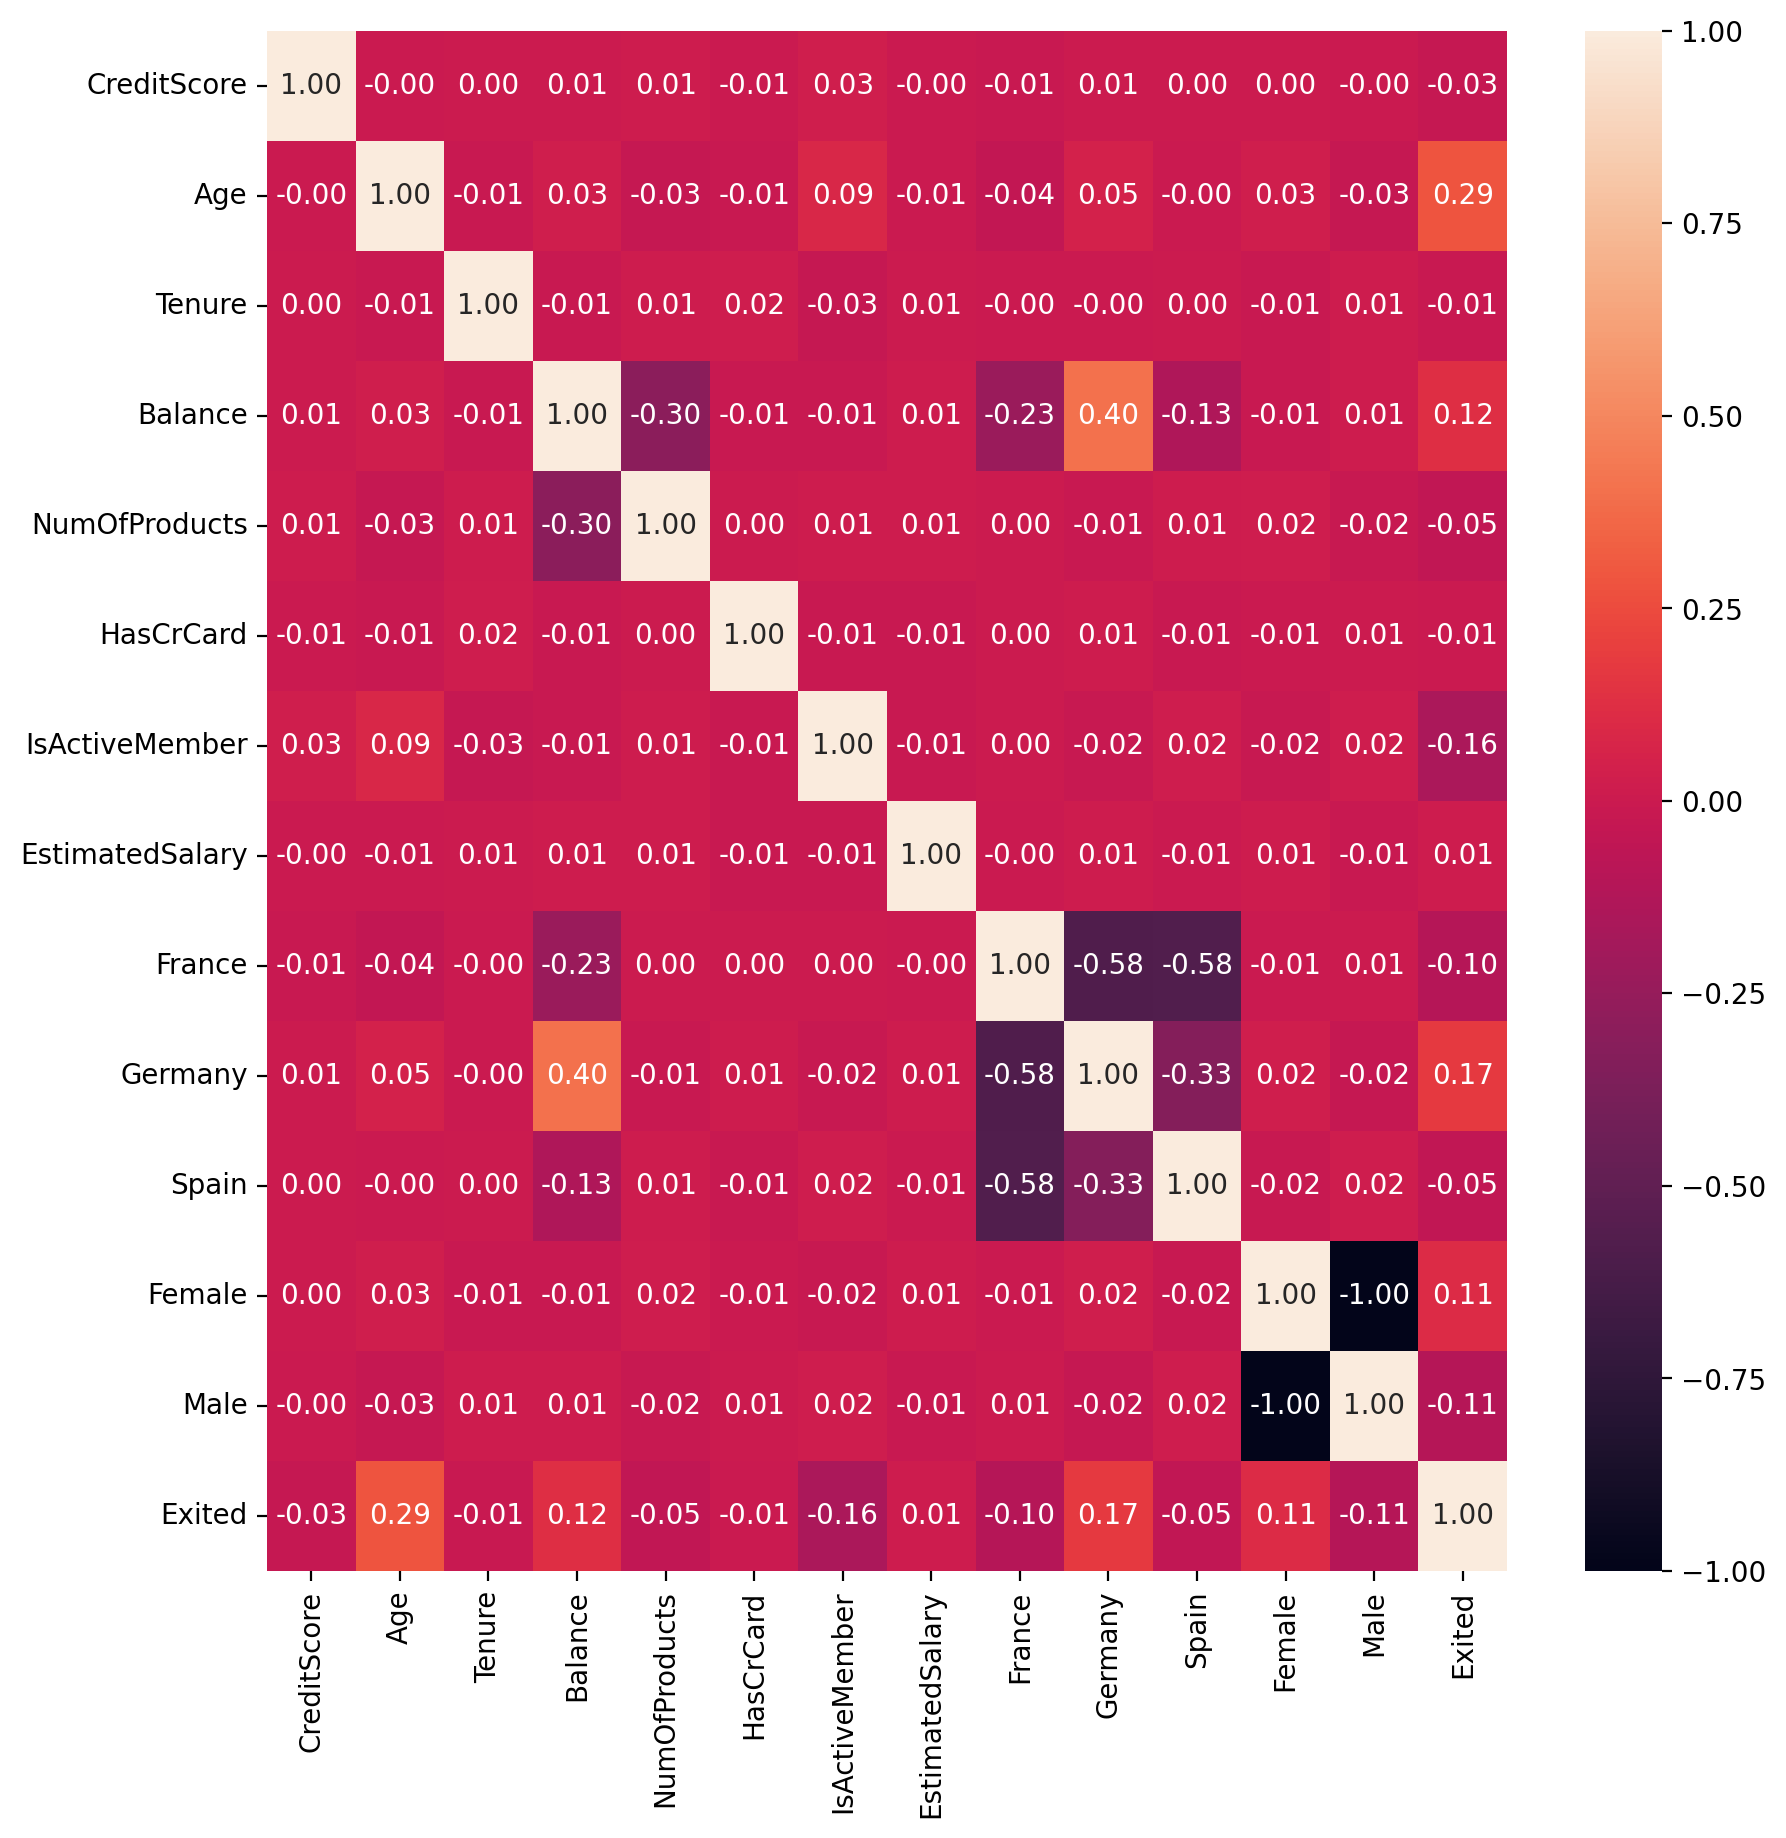

In [29]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

Выводы:
* целевой признак Exited больше всего коррелирует с возрастом (0.29), проживанием в Германии (0.17) и активным клиентом (-0.16).
* столбец со средним балансом сильно коррелирует с проживанием в Германии. Оставим его.
* слабокоррелирующие столбцы France и Male также оставим. Female не берем так как это значение является полным противоположностью Male
* Все остальные столбцы можно не учитывать для упрощения обучения

In [30]:
dataset.drop(['CreditScore', 'Tenure', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary','Spain', 'Female'], axis=1, inplace=True)
dataset.head()

C:\Users\nagor\AppData\Local\Temp\ipykernel_8096\1656209386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['CreditScore', 'Tenure', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary','Spain', 'Female'], axis=1, inplace=True)


,Age,Balance,IsActiveMember,France,Germany,Male,Exited
0,42,-1.225848,1,1.0,0.0,0.0,1
1,41,0.117350,1,0.0,0.0,0.0,0
2,42,1.333053,0,1.0,0.0,0.0,1
3,39,-1.225848,0,1.0,0.0,0.0,0
4,43,0.785728,1,0.0,0.0,0.0,0


# Выбор метрик для последующей оценки качества моделей

Выбираем метрики которые учитывают TP:
* $Precision = \frac{TP}{TP + FP}$ - показывает, какую долю объектов, которые модель предсказала как положительные, действительно являются положительными.
* $Recall  \frac{TP}{TP + FN}$ - показывает, какую долю положительных объектов модель способна обнаружить.
* $F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$ - среднее гармоническое precision и recall
* $ROC AUC$

# Выбор моделей для решения задачи классификации

Используем следующие модели
* KNN
* SVC
* Дерево решений
* Случайный лес
* Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных


In [31]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

In [33]:
from sklearn.metrics import roc_auc_score

def evaluate_models(X_train, X_test, y_train, y_test, models):
    
    metrics = ['Precision', 'Recall', 'F1-score']

    for model in models:
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f'{model.__class__.__name__}:')
        for i, metric in enumerate(metrics):
            print(f'{metric}: {round([precision, recall, f1][i], 2)}')
    

        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
  
        print("ROC AUC score:", roc_auc_score(y_test, y_proba))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model.__class__.__name__}: ROC curve')
        plt.legend(loc="lower right")
        plt.show()

In [34]:
models = [KNeighborsClassifier(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
    

KNeighborsClassifier:
Precision: 0.59
Recall: 0.36
F1-score: 0.45
ROC AUC score: 0.7436821101440463


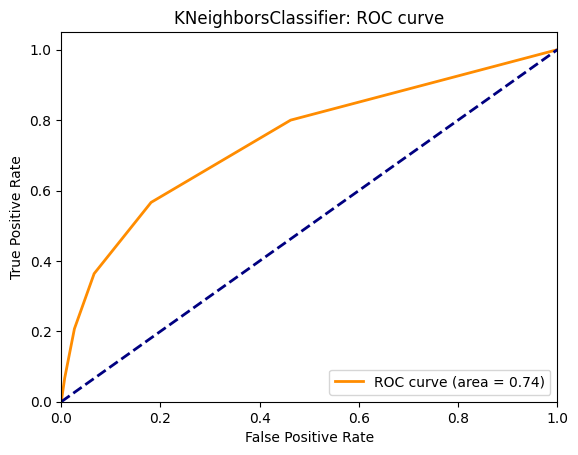

c:\Users\nagor\Desktop\семестр\ТМО\ML-6sem\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC:
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC AUC score: 0.777870092356809


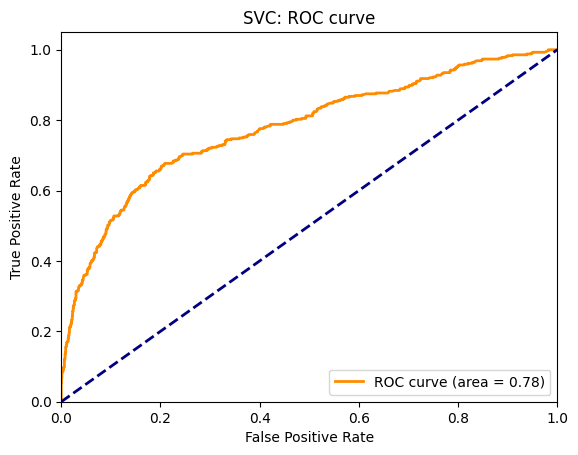

DecisionTreeClassifier:
Precision: 0.48
Recall: 0.41
F1-score: 0.44
ROC AUC score: 0.6511337463418342


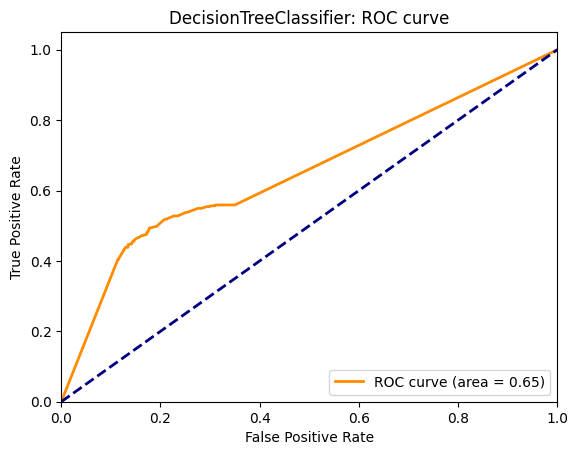

RandomForestClassifier:
Precision: 0.57
Recall: 0.42
F1-score: 0.49
ROC AUC score: 0.7658743491315417


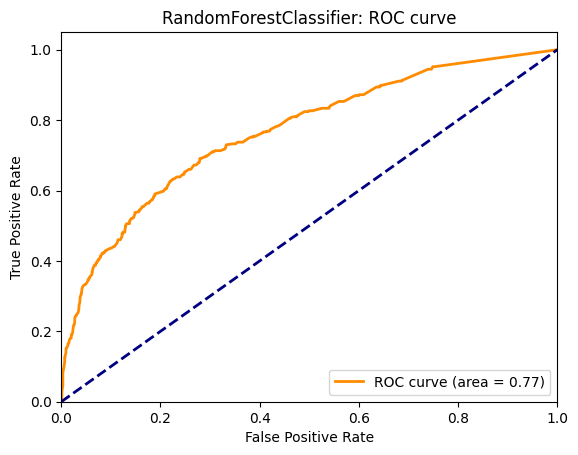

GradientBoostingClassifier:
Precision: 0.71
Recall: 0.34
F1-score: 0.46
ROC AUC score: 0.8178921363688192


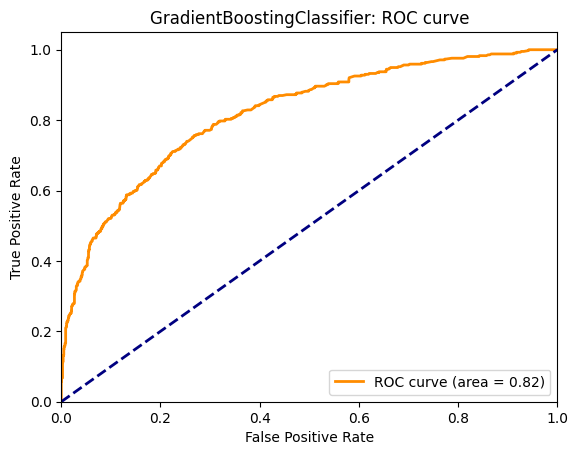

In [35]:
evaluate_models(X_train, X_test, y_train, y_test, models)

In [36]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [9,10,11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
Best score: 0.6581822827924337


In [37]:
best_knn_model = KNeighborsClassifier(**grid_search.best_params_)
best_knn_model

KNeighborsClassifier(n_neighbors=10)

In [38]:
svc_model = SVC()
param_grid = {'C': [1, 10],
              'kernel': ['linear','rbf'],
              'degree': [4, 5],
              'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'C': 1, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.8314999999999999


In [39]:
best_svc_model = SVC(**grid_search.best_params_, probability=True)
best_svc_model

SVC(C=1, degree=4, gamma='auto', probability=True)

In [41]:
tree_model = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8332499999999999


In [42]:
best_tree_model = DecisionTreeClassifier(**grid_search.best_params_)
best_tree_model

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [43]:
rf_model = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200],
              'max_depth': [3, 5, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.836125


In [44]:
best_rf_model = RandomForestClassifier(**grid_search.best_params_)
best_rf_model

RandomForestClassifier(max_depth=5, min_samples_split=5)

In [45]:
gb_model = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.05, 0.1, 0.2],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.8393750000000001


In [49]:
best_gb_model = GradientBoostingClassifier(**grid_search.best_params_)
best_gb_model


GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='sqrt',
                           min_samples_leaf=4, min_samples_split=10)

In [50]:
opt_models = [ best_knn_model, best_svc_model, best_tree_model, best_rf_model, best_gb_model]

KNeighborsClassifier:
Precision: 0.67
Recall: 0.29
F1-score: 0.41
ROC AUC score: 0.7597514347611265


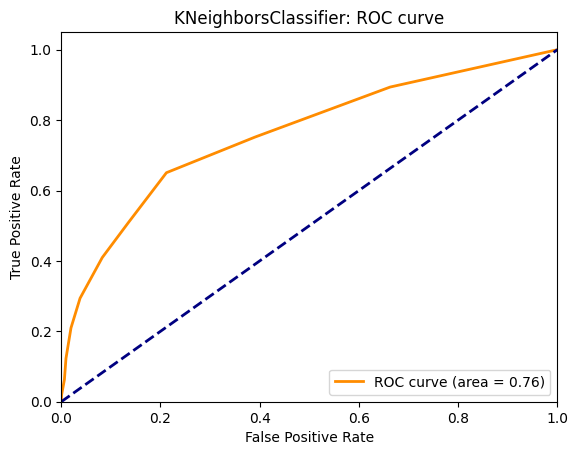

SVC:
Precision: 0.75
Recall: 0.29
F1-score: 0.42
ROC AUC score: 0.7076576336893314


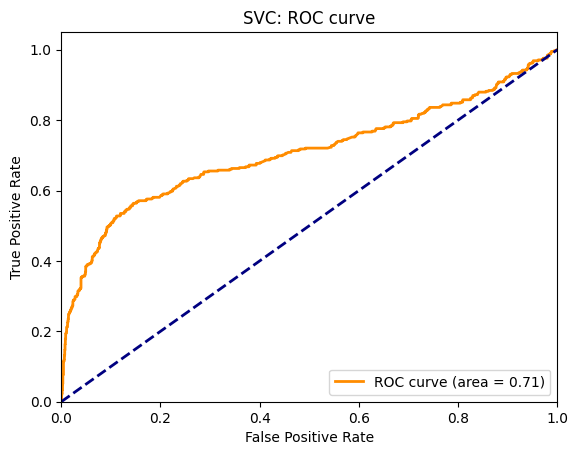

DecisionTreeClassifier:
Precision: 0.82
Recall: 0.25
F1-score: 0.38
ROC AUC score: 0.7988202652882825


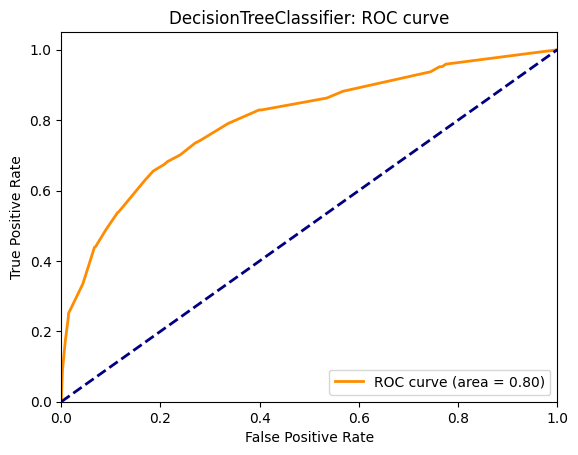

RandomForestClassifier:
Precision: 0.76
Recall: 0.3
F1-score: 0.43
ROC AUC score: 0.8176253278096614


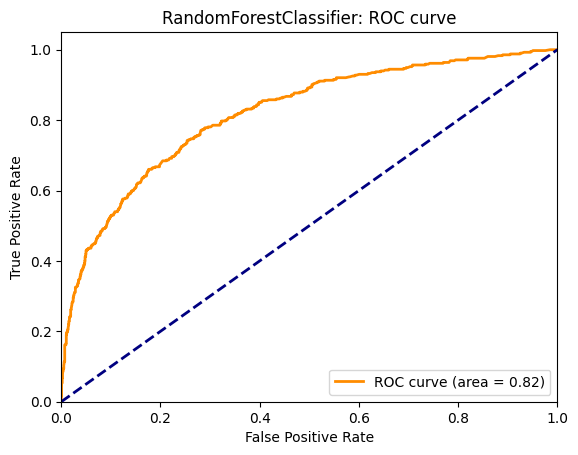

GradientBoostingClassifier:
Precision: 0.71
Recall: 0.34
F1-score: 0.46
ROC AUC score: 0.8189388468701303


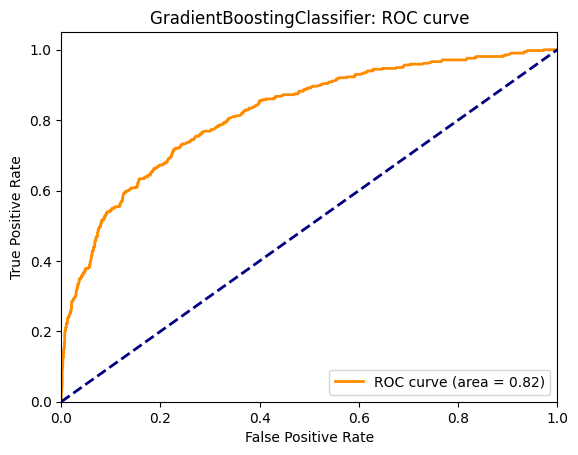

In [51]:
evaluate_models(X_train, X_test, y_train, y_test, opt_models)

На основании трех метрик из четырех лучшими для решения данной задачи классификации оказались модели градиентного бустинга и метода случайного леса.